<a href="https://colab.research.google.com/github/A-R-I-N-D-A-M/intermediate/blob/master/QnA_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

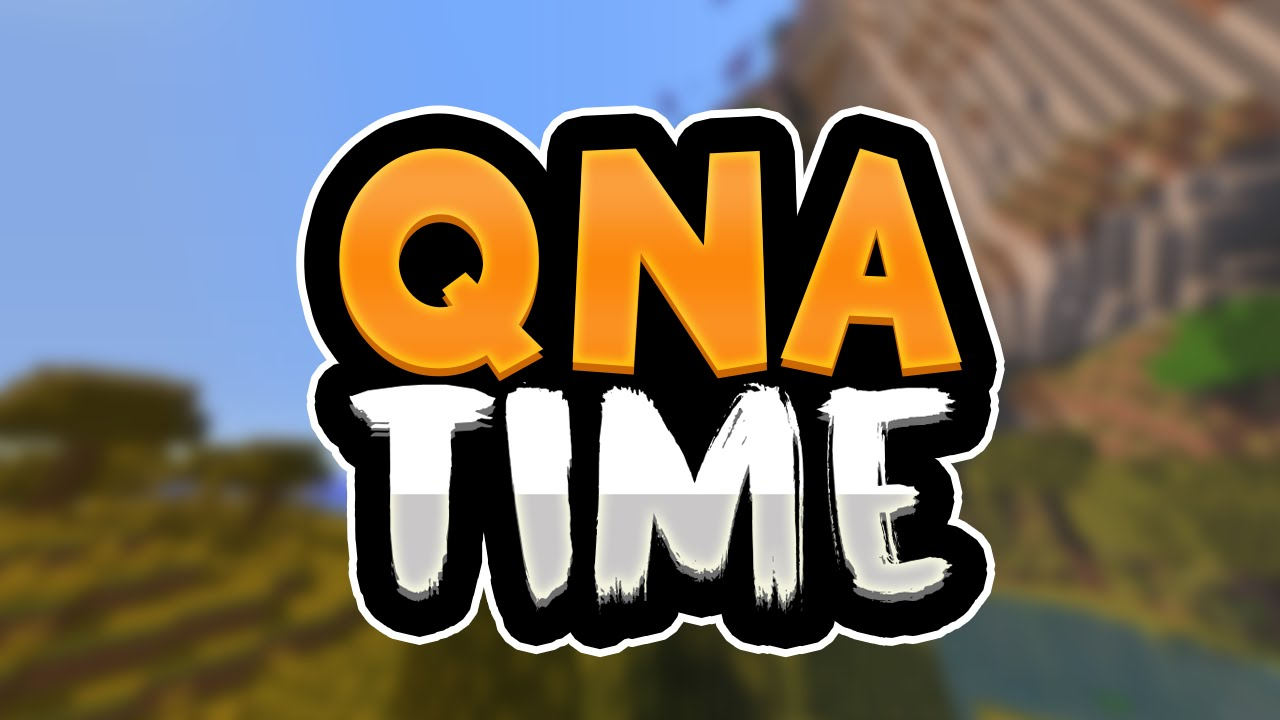


#  **Introduction**

Is it really necessary to manually pull out the answers for your queries from a large paragraph/document in the year of 2021??

I will say - Not really, if you have enough time, then you can spend hours to read out all the paragraph/document or else you just call 'BERT' and it will give your answers from the documents within a second. 

Cool idea, isn't it?

So, if you don't waste your time in the future for QnA, then this article can help you out.  

### **BERT...??? What's that?**

BERT sounds very fancy now a days but it has a deep theory and strong mathematical calculation behind it.  BERT stands for "Bidirectional Encoder Representations from Transformers". 

Ohhhh... Sounds very hard, right !! Don't worry, I will make you understand from the very base level. 
At that time, it broke all the privious state of the art models performances in many tasks. 

### **History**

In Oct'18, Google AI team has published the research paper and after few days made the API public for more improvement in NLP world.

[Research paper](https://arxiv.org/pdf/1810.04805.pdf)




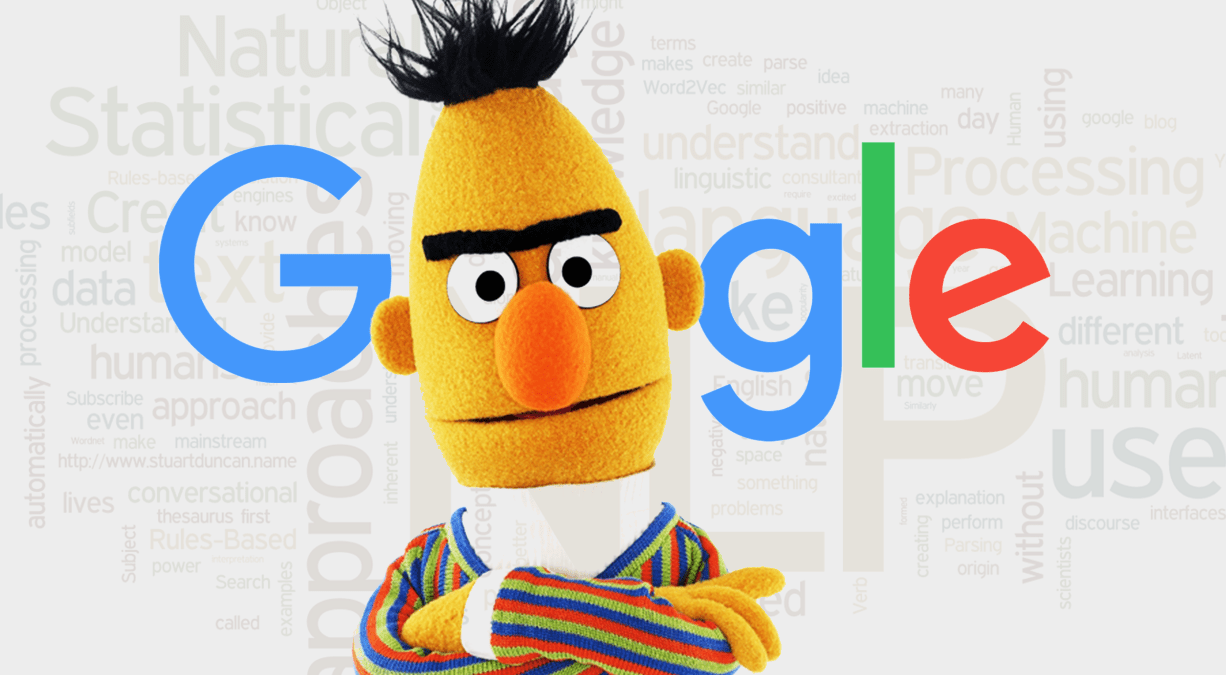

You got correct. It is the BERT. Looks like a funny character but it has huge capacity in the field of natural language processing. Majorly it can done
- Text classification
- Next sentence prediction( classification)
- Extractive QnA
- Extractive text summarization
- NER (Name entity recognition)
and many more.

# **Architecture**



**BERT** is build on top of **Transformers**. 

Now what is transformers..?? 

Transformers was the first break through in the world of NLP and become the state of the art model in the early 2018. It was introduced by team of Google Brain. I will not go though the transformers in this article, but I strongly recommend to understand BERT, you need to understand Transformers first. If you understant Transformers, then BERT is easy for you. Here is one of the best [blog](http://jalammar.github.io/illustrated-transformer/) I have read about Transformer by Jay Alammar.

BERT is used as transfomer learning like VGG16, ResNet, Inception Net for CNN tasks. We can fine tune the BERT model as per our requirements. But any one can train BERT model from scratch on there own datasets but is not advisable as first of all it requires a very powerful GPU setup as well as large text data, which is not quite possible for a perticular domain specific task. 

People takes the model, passes their data with a specific task and fine tune only last output layer. Job is done ! Let say, we have classification task, so we call the model, pass through our data and fine tine last layer output, so that model can prodeuce some featured outputs, then we pass the featured outputs to any simple classifier like logistic regression/ SVM as featured inputs and predict the ouput classes. Simple, right?



BERT works only on the encoder part of Transformers. It has two models - BERT base (with 12 encoder layers) and BERT large (with 24 encoder layers). It takes the word,  do word embeddings with contextual manner ( as it used bidirectional concept from RNN) adding with positonal vector of each 512 dimenstion. Then passes them thorugh the network. Each encoder(self attention) layer does the calculation and passes it to the next layers. And finally, last layer generates the featured outputs. 

And based on our task, we take these featured outputs and push them to another network to generate our relavant output.

Internally BERT follows two strategies to train the model - **MLM** (masked language modelling) and **NSP** (next sentence prediction). Now you may wonder, what are the Alien things....? Actually they are very simple concepts. **MLM** is a technique when BERT takes the sequence of inputs, then in the sequence 15% of words randomly masked by the network itself, so that model can classify what is the next word. It is a kind of regularization that brings the network more robust and doesn't make model overfit. **NSP** is another beatiful classification technique that works like follows - network takes two different sequences at a time followed by special token [SEP], then the task is if first and second sequence of sentences are given, then is the second sequence is relavent with first sequence or not. That means of two sequences are relavent, then classified as 1 else 0. These are the unique techniques that internally work in BERT.  


This was all about BERT architecture and internal functionalites in very basic. If some one is interested, please visit [the blog](http://jalammar.github.io/illustrated-bert/) published by the same person, Jay Alammar.

# QnA

### Now move towards to our QnA project. 

Like some major tasks, One of the very interesting task BERT can do that is given a paragraph or document , it can extract relavent answers for you. One thing need to remember, it can only return extractive answers from the paragraph or document. It cannot produce abstractive answers like in descriptive manner.

<img src="https://i.imgur.com/fKNAhKH.png" alt=" " width="75%" height="75%">

This is picture taken from research papaer that shows how we pre train the model and fine tune for our QnA task. What ever the task is, pre training is same for all, as I already mentioned earlier. BERT has already trained the model for QnA on SQuAD dataset. SQuAD stands for Stanford Question Ansewring Dataset ([SQuAD](https://rajpurkar.github.io/SQuAD-explorer/)).

SQuAD2.0 a new version that combines the 100,000 questions in SQuAD1.1 with over 50,000 unanswerable questions written adversarially by crowdworkers to look similar to answerable ones. To do well on SQuAD2.0, systems must not only answer questions when possible, but also determine when no answer is supported by the paragraph and abstain from answering. That is the whole logic behind it.

# Code

Let's code and together.

In [ ]:
# First need to install transformer module from Huggingface library

! pip install transformers==3.0.0

     |████████████████████████████████| 757kB 5.2MB/s 
     |████████████████████████████████| 890kB 16.0MB/s 
     |████████████████████████████████| 3.0MB 21.2MB/s 
     |████████████████████████████████| 1.2MB 34.0MB/s 
  Created wheel for sacremoses: filename=sacremoses-0.0.43-cp37-none-any.whl size=893262 sha256=7b47a3d90d682a7f4527cd80d8d1a573e5dc07513595af003ce889ee1698baa3
  Stored in directory: /root/.cache/pip/wheels/29/3c/fd/7ce5c3f0666dab31a50123635e6fb5e19ceb42ce38d4e58f45
Successfully built sacremoses


In [ ]:
# Huggingface works on two libraries - Tensorflow and Pytoch. Here I will use Pytorch.
import torch
from transformers import BertForQuestionAnswering
model=BertForQuestionAnswering.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')
from transformers import BertTokenizer
tokenizer=BertTokenizer.from_pretrained('bert-large-uncased-whole-word-masking-finetuned-squad')

In [ ]:
# let's define the paragraph and question

question = '''Why was the student group called "the Methodists?"'''

paragraph = ''' The movement which would become The United Methodist Church began in the mid-18th century within the Church of England.
            A small group of students, including John Wesley, Charles Wesley and George Whitefield, met on the Oxford University campus.
            They focused on Bible study, methodical study of scripture and living a holy life.
            Other students mocked them, saying they were the "Holy Club" and "the Methodists", being methodical and exceptionally detailed in their Bible study, opinions and disciplined lifestyle.
            Eventually, the so-called Methodists started individual societies or classes for members of the Church of England who wanted to live a more religious life. '''

In [ ]:
# now we need to push question and paragraph in a single sequence with some special charecter i.e. [SEP] in between them. library can handle the special token internally
encoding=tokenizer.encode_plus(text=question,text_pair=paragraph,add_special_tokens=True)
input=encoding['input_ids']
sentence_embedding=encoding['token_type_ids']

In [ ]:
print(input)

[101, 2339, 2001, 1996, 3076, 2177, 2170, 1000, 1996, 8938, 2015, 1029, 1000, 102, 1996, 2929, 2029, 2052, 2468, 1996, 2142, 8938, 2277, 2211, 1999, 1996, 3054, 1011, 4985, 2301, 2306, 1996, 2277, 1997, 2563, 1012, 1037, 2235, 2177, 1997, 2493, 1010, 2164, 2198, 11482, 1010, 2798, 11482, 1998, 2577, 2317, 3790, 1010, 2777, 2006, 1996, 4345, 2118, 3721, 1012, 2027, 4208, 2006, 6331, 2817, 1010, 4118, 7476, 2817, 1997, 18919, 1998, 2542, 1037, 4151, 2166, 1012, 2060, 2493, 24195, 2068, 1010, 3038, 2027, 2020, 1996, 1000, 4151, 2252, 1000, 1998, 1000, 1996, 8938, 2015, 1000, 1010, 2108, 4118, 7476, 1998, 17077, 6851, 1999, 2037, 6331, 2817, 1010, 10740, 1998, 28675, 9580, 1012, 2776, 1010, 1996, 2061, 1011, 2170, 8938, 2015, 2318, 3265, 8384, 2030, 4280, 2005, 2372, 1997, 1996, 2277, 1997, 2563, 2040, 2359, 2000, 2444, 1037, 2062, 3412, 2166, 1012, 102]


Here input represents the numeric representation of each words of question and paragraph.

In [ ]:
# if we need to covert these numeric to original sequence then do the following - 
print(tokenizer.decode(input))

[CLS] why was the student group called " the methodists? " [SEP] the movement which would become the united methodist church began in the mid - 18th century within the church of england. a small group of students, including john wesley, charles wesley and george whitefield, met on the oxford university campus. they focused on bible study, methodical study of scripture and living a holy life. other students mocked them, saying they were the " holy club " and " the methodists ", being methodical and exceptionally detailed in their bible study, opinions and disciplined lifestyle. eventually, the so - called methodists started individual societies or classes for members of the church of england who wanted to live a more religious life. [SEP]


[CLS] and [SEP] are the special tokens, used internally by BERT.

In [ ]:
# now what is 'sentence_embedding' variable mention on the above code, let's see it

print(sentence_embedding)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]


It is nothing but kind of seperation between question and paragraph so that BERT can distinguish them. 0 represent question part and 1 shows the document part from where answer will be generated.

In [ ]:
tokens= tokenizer.convert_ids_to_tokens(input)
print(type(tokens))
print(tokens)

<class 'list'>
['[CLS]', 'why', 'was', 'the', 'student', 'group', 'called', '"', 'the', 'methodist', '##s', '?', '"', '[SEP]', 'the', 'movement', 'which', 'would', 'become', 'the', 'united', 'methodist', 'church', 'began', 'in', 'the', 'mid', '-', '18th', 'century', 'within', 'the', 'church', 'of', 'england', '.', 'a', 'small', 'group', 'of', 'students', ',', 'including', 'john', 'wesley', ',', 'charles', 'wesley', 'and', 'george', 'white', '##field', ',', 'met', 'on', 'the', 'oxford', 'university', 'campus', '.', 'they', 'focused', 'on', 'bible', 'study', ',', 'method', '##ical', 'study', 'of', 'scripture', 'and', 'living', 'a', 'holy', 'life', '.', 'other', 'students', 'mocked', 'them', ',', 'saying', 'they', 'were', 'the', '"', 'holy', 'club', '"', 'and', '"', 'the', 'methodist', '##s', '"', ',', 'being', 'method', '##ical', 'and', 'exceptionally', 'detailed', 'in', 'their', 'bible', 'study', ',', 'opinions', 'and', 'disciplined', 'lifestyle', '.', 'eventually', ',', 'the', 'so', '-

It is nothing but a list of all the words present in the question and sequence. I will use it later.

In [ ]:
print('Length of the entire sequence is :',len(input))

Length of the entire sequence is : 143


Now, here is the most interisting part of the project. How model can idenitify which word/words will be the answer from the paragraph?

After prodeuce the featured outputs from the last layer, in QnA project, every FFNN of the last encoder layer has two different classifier on top of them. One is responsible for classifying the start index of the answer and another one is responsible for classifing the end index of the answer. Which one gives highest probability score among all the sequence of words, corresponding input word is responsible for starting or ending index.  

In [ ]:
# now do this with the code

start_score,end_score=model(input_ids=torch.tensor([input]),token_type_ids=torch.tensor([sentence_embedding]))
start_index=torch.argmax(start_score)
end_index=torch.argmax(end_score)

In [ ]:
print('The starting index of the answer is :',start_index,' and end index is :',end_index)

The starting index of the answer is : tensor(98)  and end index is : tensor(111)


It is showing tensor before the index for internally Pytorch convert the input to pytorch tensor.

In [ ]:
# visualization of the start and end index, so that it will clear to all of you.

import matplotlib.pyplot as plt
import seaborn as sns

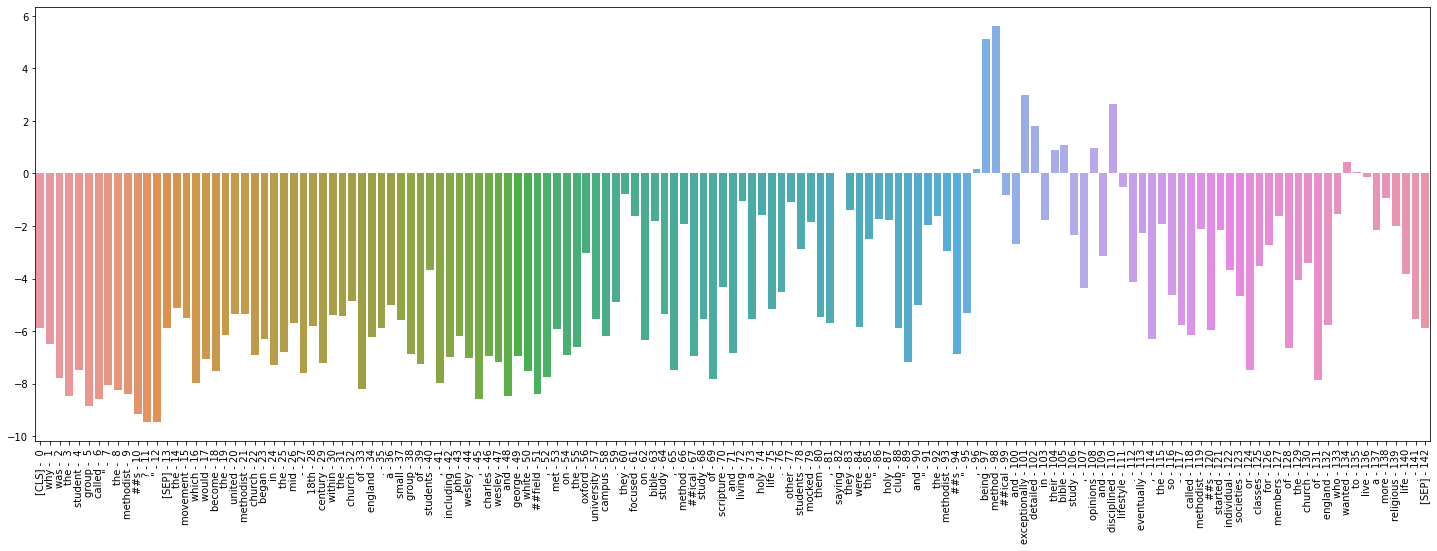

In [ ]:
token_labels = []
for (i, token) in enumerate(tokens):
    token_labels.append('{:} - {:>2}'.format(token, i))

s_scores = start_score.detach().numpy().flatten()
e_scores= end_score.detach().numpy().flatten()

plt.figure(figsize=(25,8))
ax=sns.barplot(x=token_labels,y=s_scores)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

This is for the start index.

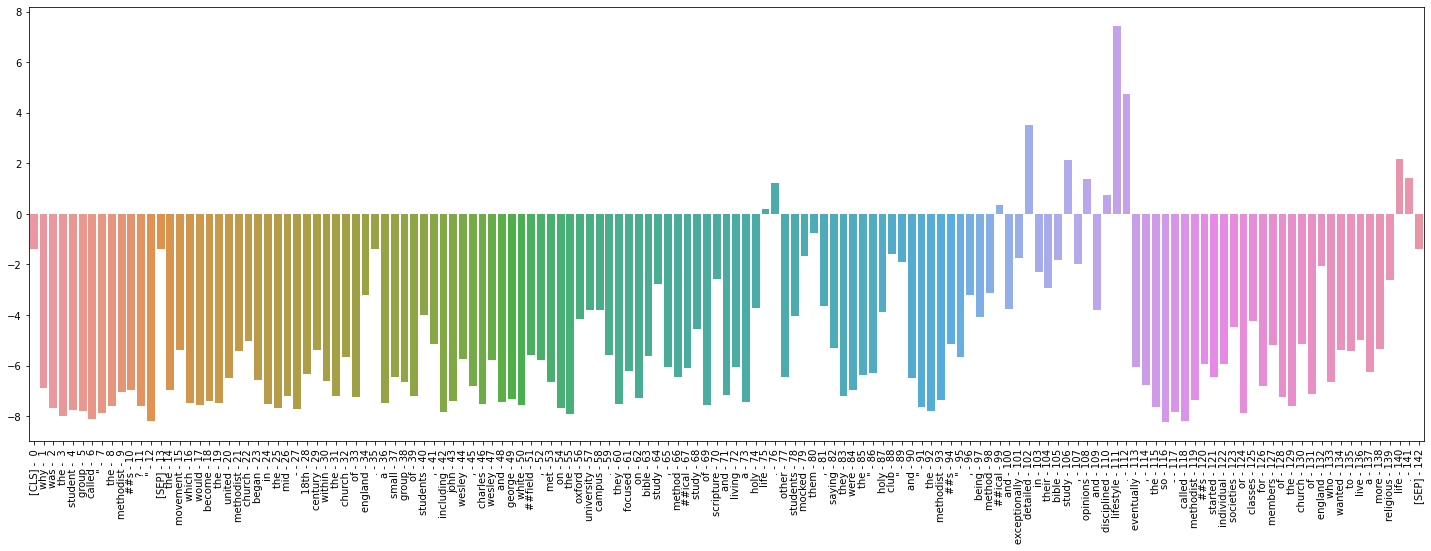

In [ ]:
plt.figure(figsize=(25,8))
ax=sns.barplot(x=token_labels,y=e_scores)
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)
plt.show()

It is for end index.

In [ ]:
# now getting the answer

answer= ' '.join(tokens[start_index:end_index+1])
print('The answer is :', answer)

The answer is : method ##ical and exceptionally detailed in their bible study , opinions and disciplined lifestyle


Wonderful !! We got our answer. But one problem is there, some word contains '##'. Bert does the tokenization suing subtoken functioanlity. So if some words does not in there vocabulary, it tries to break down into sub words and tries to find relavent words. In our case the word "methodical" was not present in BERT vocabulary, so it devided the word into "method" and "##ical". '##' term used which word not present in the vocabulary.

In [ ]:
# now below is the code to join the '##' term with the original one

answer=tokens[start_index]
for i in range(start_index+1,end_index+1):
  if tokens[i][0:2]=='##':
    answer=answer+tokens[i][2:]
  else:
    answer=answer+' '+tokens[i]
print('The answer is :', answer)

The answer is : methodical and exceptionally detailed in their bible study , opinions and disciplined lifestyle


**Done**. 

Now creating a fucntion for automated QnA.

In [ ]:
def QnA(question,passage):
  encoding=tokenizer.encode_plus(text=question,text_pair=passage,add_special_tokens=True)
  inputs=encoding['input_ids']
  sentence_embedding=encoding['token_type_ids']
  tokens=tokenizer.convert_ids_to_tokens(inputs)
  start_score,end_score=model(input_ids=torch.tensor([inputs]),token_type_ids=torch.tensor([sentence_embedding]))
  start_index=torch.argmax(start_score)
  end_index=torch.argmax(end_score)

  answer=' '.join(tokens[start_index:end_index+1])
  corrected_answer=''
  for word in answer.split():
    if word[0:2]=='##':
      corrected_answer=corrected_answer+word[2:]
    else:
      corrected_answer=corrected_answer+' '+word
  print(corrected_answer)

In [ ]:
passage='''Tata Consultancy Services Limited is an Indian multinational information technology services and consulting company headquartered in Mumbai, Maharashtra, India. It is a subsidiary of the Tata Group and operates in 149 locations across 46 countries. TCS is the second largest Indian company by market capitalisation.'''
q1='What is Tata Consultancy Services?'
q2= 'Where is the headquater?'

In [ ]:
QnA(q1,passage)

 an indian multinational information technology services and consulting company


In [ ]:
QnA(q2,passage)

 mumbai , maharashtra , india


I think, I am able to make you understand about the project.